Deep Neural Networks PyTorch

Classical machine learning relies on using statistics to determine relationships between features and labels, and can be very effective for creating predictive models. However, a massive growth in the availability of data coupled with advances in the computing technology required to process it has led to the emergence of new machine learning techniques that mimic the way the brain processes information in a structure called an artificial neural network.

PyTorch is a framework for creating machine learning models, including deep neural networks (DNNs). In this example, we'll use PyTorch to create a simple neural network that classifies penguins into species based on the length and depth of their culmen (bill), their flipper length, and their body mass.

Explore the Dataset

In [5]:
import pandas as pd

penguins = pd.read_csv('penguins.csv').dropna()

penguins['FlipperLength'] = penguins['FlipperLength']/10
penguins['BodyMass'] = penguins['BodyMass']/100

for i in range(1,3):
    penguins = penguins.append(penguins)
    
sample = penguins.sample(10)
sample

C:\Users\MANDEE~1\AppData\Local\Temp/ipykernel_7344/1796724258.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  penguins = penguins.append(penguins)
C:\Users\MANDEE~1\AppData\Local\Temp/ipykernel_7344/1796724258.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  penguins = penguins.append(penguins)


,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
170,46.2,14.5,20.9,48.0,1
1,39.5,17.4,18.6,38.0,0
160,43.3,13.4,20.9,44.0,1
209,45.5,15.0,22.0,50.0,1
185,59.6,17.0,23.0,60.5,1
168,42.0,13.5,21.0,41.5,1
194,45.3,13.7,21.0,43.0,1
132,36.8,18.5,19.3,35.0,0
63,41.1,18.2,19.2,40.5,0
261,48.1,15.1,20.9,55.0,1


In [7]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[', row[0], row[1], row[2], row[3], int(row[4]), ']', penguin_classes[int(row[-1])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 54.3 15.7 23.1 56.5 1 ] Gentoo
[ 50.7 19.7 20.3 40.5 2 ] Chinstrap
[ 34.5 18.1 18.7 29.0 0 ] Adelie
[ 50.0 16.3 23.0 57.0 1 ] Gentoo
[ 52.7 19.8 19.7 37.25 2 ] Chinstrap
[ 42.8 18.5 19.5 42.5 0 ] Adelie
[ 40.6 17.2 18.7 34.75 0 ] Adelie
[ 36.0 17.9 19.0 34.5 0 ] Adelie
[ 49.4 15.8 21.6 49.25 1 ] Gentoo
[ 38.6 17.2 19.9 37.5 0 ] Adelie


In [9]:
from sklearn.model_selection import train_test_split

features = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']
label = 'Species'

X_train, X_test, y_train, y_test = train_test_split(penguins[features].values,
                                                   penguins[label].values,
                                                   test_size=0.30,
                                                   random_state=0)

print('Training Set: %d, Test Set: %d \n' % (len(X_train), len(X_test)))
print('Sample of features and labels:')

for n in range(0,24):
    print(X_train[n], y_train[n], '(' + penguin_classes[y_train[n]] + ')')

Training Set: 957, Test Set: 411 

Sample of features and labels:
[51.1 16.5 22.5 52.5] 1 (Gentoo)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.5 16.2 22.9 58. ] 1 (Gentoo)
[39.3 20.6 19.  36.5] 0 (Adelie)
[42.5 20.7 19.7 45. ] 0 (Adelie)
[50.  15.3 22.  55.5] 1 (Gentoo)
[50.2  18.7  19.8  37.75] 2 (Chinstrap)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.1  14.5  21.2  46.25] 1 (Gentoo)
[43.2 16.6 18.7 29. ] 2 (Chinstrap)
[38.8  17.6  19.1  32.75] 0 (Adelie)
[37.8 17.1 18.6 33. ] 0 (Adelie)
[45.8 14.2 21.9 47. ] 1 (Gentoo)
[43.8 13.9 20.8 43. ] 1 (Gentoo)
[36.  17.1 18.7 37. ] 0 (Adelie)
[43.3 13.4 20.9 44. ] 1 (Gentoo)
[36.  18.5 18.6 31. ] 0 (Adelie)
[41.1  19.   18.2  34.25] 0 (Adelie)
[33.1 16.1 17.8 29. ] 0 (Adelie)
[40.9 13.7 21.4 46.5] 1 (Gentoo)
[45.2 17.8 19.8 39.5] 2 (Chinstrap)
[48.4 14.6 21.3 58.5] 1 (Gentoo)
[43.6 13.9 21.7 49. ] 1 (Gentoo)
[38.5  17.9  19.   33.25] 0 (Adelie)


Install and import the PyTorch libraries

In [11]:
!pip install torch torchvision torchaudio

  Using cached torch-1.13.1-cp39-cp39-win_amd64.whl (162.5 MB)
  Using cached torchvision-0.14.1-cp39-cp39-win_amd64.whl (1.1 MB)
  Using cached torchaudio-0.13.1-cp39-cp39-win_amd64.whl (2.0 MB)


In [12]:
import torch
import torch.nn as nn
import torch.utils.data as td

torch.manual_seed(0)

print('Libraries imported - ready to use PyTorch', torch.__version__)

Libraries imported - ready to use PyTorch 1.13.1+cpu


Prepare the data for PyTorch

In [14]:
#Create a dataset and loader for the training data and labels
train_x = torch.Tensor(X_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = td.TensorDataset(train_x, train_y)
train_loader = td.DataLoader(train_ds, batch_size=20,
    shuffle=False, num_workers=1)

#Create a dataset and loader for the testing data and labels
test_x = torch.Tensor(X_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=20,
    shuffle=False, num_workers=1)
print('Ready to load data')

Ready to load data


Define a neural network

In [18]:
#Number of hidden layer nodes
hl = 10

#Define the neural network
class PenguinNet(nn.Module):
    def __init__(self):
        super(PenguinNet, self).__init__()
        self.fc1 = nn.Linear(len(features), hl)
        self.fc2 = nn.Linear(hl, hl)
        self.fc3 = nn.Linear(hl, len(penguin_classes))
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return x

#Create a model instance from the network
model = PenguinNet()
print(model)

PenguinNet(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
)


Train the model

In [19]:
def train(model, data_loader, optimiser):
    #Set the model to training mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        #feedforward
        optimiser.zero_grad()
        out = model(data)
        loss = loss_criteria(out, target)
        train_loss += loss.item()
        
        #backpropagate
        loss.backward()
        optimiser.step()
        
    #Return average loss
    avg_loss = train_loss/(batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss

def test(model, data_loader):
    #Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            #Get the predictions
            out = model(data)
            
            #calculate the loss
            test_loss += loss_criteria(out, target).item()
            
            #Calculate the accuracy
            _, predicted = torch.max(out.data, 1)
            correct += torch.sum(target==predicted).item()
            
    #Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct/len(data_loader.dataset)))
    
    #return average loss for the epoch
    return avg_loss

#Specify the loss criteria (we'll use CrossEntropyLoss for multi-class classification)
loss_criteria = nn.CrossEntropyLoss()

#Use an 'Adam' optimiser to adjust weights
# (see https://pytorch.org/docs/stable/optim.html#algorithms for details of supported algorithms)
learning_rate = 0.001
optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimiser.zero_grad()

#We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

#Train over 50 epochs
epochs = 50
for epoch in range(1, epochs+1):
    
    #print the epoch number
    print('Epoch: {}'.format(epoch))
    
    #Feed training data into the model to optimise the weights
    train_loss = train(model, train_loader, optimiser)
    
    #Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    #Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)
    
    
    

Epoch: 1
Training set: Average loss: 1.217647
Validation set: Average loss: 1.088032, Accuracy: 174/411 (42%)

Epoch: 2
Training set: Average loss: 1.068396
Validation set: Average loss: 1.069931, Accuracy: 174/411 (42%)

Epoch: 3
Training set: Average loss: 1.050276
Validation set: Average loss: 1.052078, Accuracy: 174/411 (42%)

Epoch: 4
Training set: Average loss: 1.028332
Validation set: Average loss: 1.026955, Accuracy: 174/411 (42%)

Epoch: 5
Training set: Average loss: 0.979634
Validation set: Average loss: 0.921477, Accuracy: 275/411 (67%)

Epoch: 6
Training set: Average loss: 0.829697
Validation set: Average loss: 0.783960, Accuracy: 295/411 (72%)

Epoch: 7
Training set: Average loss: 0.712835
Validation set: Average loss: 0.689674, Accuracy: 301/411 (73%)

Epoch: 8
Training set: Average loss: 0.629350
Validation set: Average loss: 0.616403, Accuracy: 305/411 (74%)

Epoch: 9
Training set: Average loss: 0.564227
Validation set: Average loss: 0.559889, Accuracy: 310/411 (75%)

E

Review training and validation loss

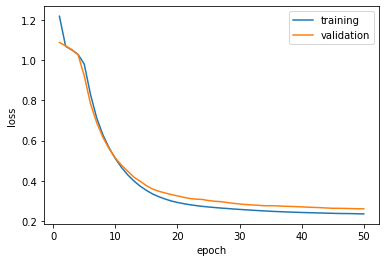

In [20]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

View the learned weights and biases

In [22]:
for param_tensor in model.state_dict():
    print(param_tensor, '\n', model.state_dict()[param_tensor].numpy())

fc1.weight 
 [[-0.02278294  0.1771208  -0.3227539   0.47124088]
 [-0.4134612   0.00689125 -0.08500838 -0.26333648]
 [ 0.06608552  0.41345936 -0.14615977 -0.29684705]
 [-0.18491942 -0.49557418  0.22569698 -0.24013186]
 [-0.35189515 -0.3065054   0.26925105  0.24607432]
 [ 0.46911356  0.1253667  -0.34137928 -0.26739663]
 [-0.10806599  0.9226123   0.16609745 -0.2555866 ]
 [-0.2350387  -0.4727345   0.108024   -0.28059125]
 [-0.4457879   0.43843824 -0.3247056  -0.05688077]
 [ 0.14324677  0.01592916 -0.33644086 -0.40416086]]
fc1.bias 
 [ 0.53491724  0.08141935  0.41481227 -0.1676203   0.12921287 -0.33114547
  0.24372055 -0.3045221   0.16910046  0.15808296]
fc2.weight 
 [[-0.02869887 -0.07112031 -0.19493222  0.21868566 -0.2458707   0.10745908
  -0.12879105 -0.15256979  0.05680877 -0.16426672]
 [-0.00242863  0.06210107 -0.23479578  0.05265146  0.12162821  0.06881932
  -0.09831192 -0.2592396  -0.04874781  0.10982832]
 [ 0.00472087  0.12003407  0.21059588 -0.16511883  0.0164038   0.5628437
  -0.2

Evaluate model performance

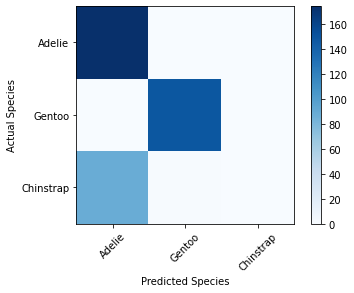

In [25]:
#Pytorch doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
from sklearn.metrics import confusion_matrix
import numpy as np

# Set the model to evaluate mode
model.eval()

# Get predictions for the test data
x = torch.Tensor(X_test).float()
_, predicted = torch.max(model(x).data, 1)

# Plot the confusion matrix
cm = confusion_matrix(y_test, predicted.numpy())
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

Save the trained model

In [26]:
model_file = 'penguin_classifier.pt'
torch.save(model.state_dict(), model_file)
del model
print('model saved as', model_file)

model saved as penguin_classifier.pt


Use the trained model

In [27]:
# New penguin features
x_new = [[50.4,15.3,20,50]]
print ('New sample: {}'.format(x_new))

# Create a new model class and load weights
model = PenguinNet()
model.load_state_dict(torch.load(model_file))

# Set model to evaluation mode
model.eval()

# Get a prediction for the new data sample
x = torch.Tensor(x_new).float()
_, predicted = torch.max(model(x).data, 1)

print('Prediction:',penguin_classes[predicted.item()])

New sample: [[50.4, 15.3, 20, 50]]
Prediction: Gentoo
